In [1]:
from logging import setLoggerClass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizations

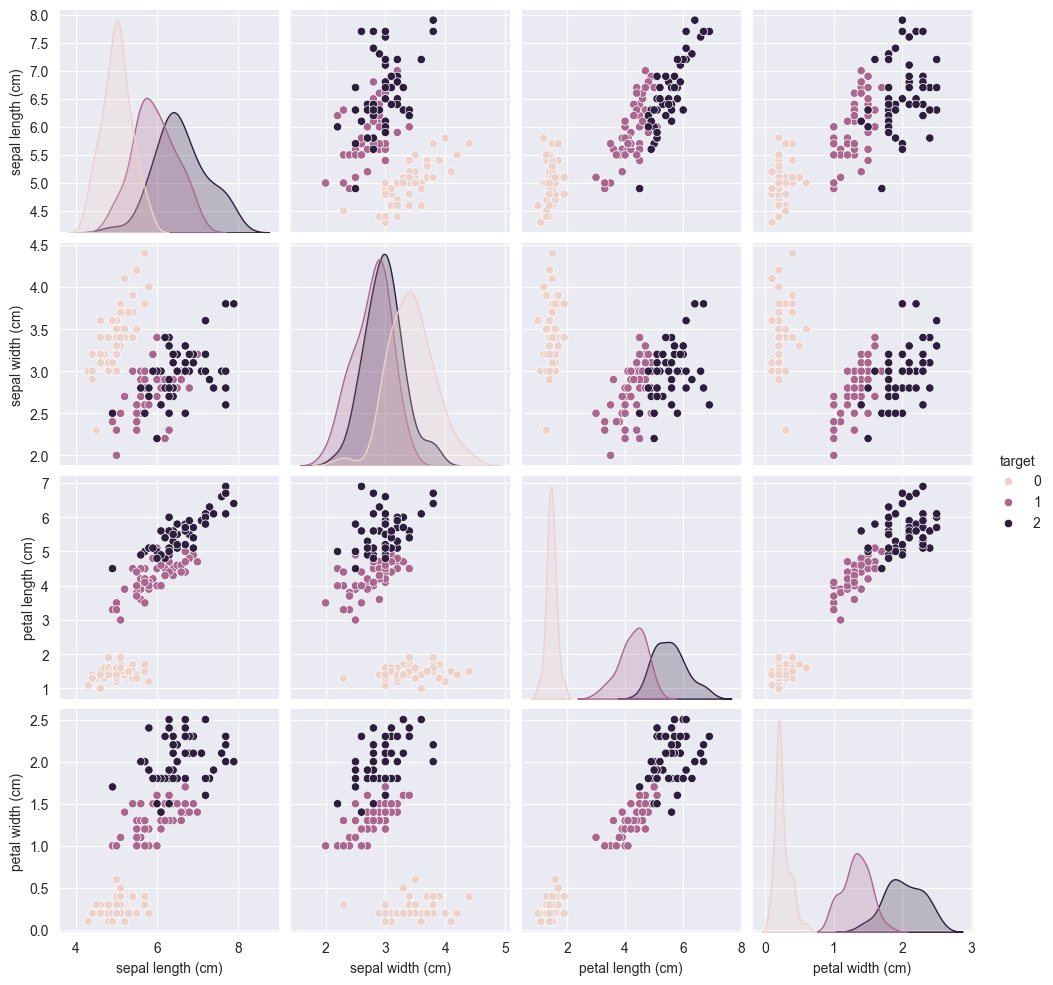

In [6]:
df = pd.concat([X, y], axis=1)
sns.pairplot(df, hue='target')

plt.savefig('figures/iris_pairplot.png', bbox_inches='tight')

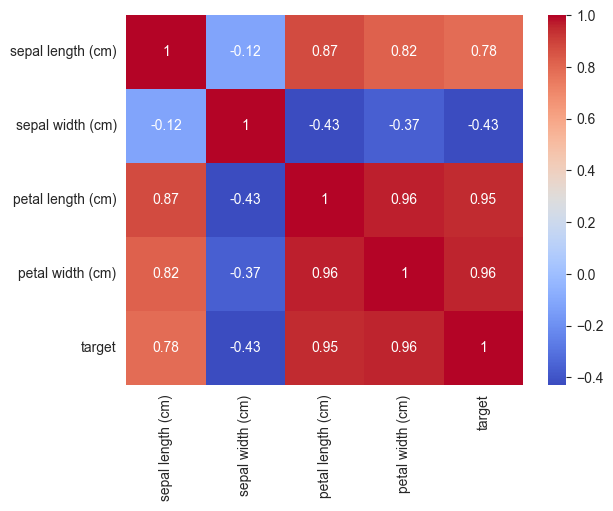

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [10]:
y_train.value_counts()

target
0    40
2    40
1    40
Name: count, dtype: int64

In [11]:
y_test.value_counts()

target
0    10
2    10
1    10
Name: count, dtype: int64

Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_train_scaled[:5]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575]])

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

In [15]:
clf.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
clf.coef_

array([[-1.08894494,  1.02420763, -1.79905609, -1.68622819],
       [ 0.53633654, -0.36048698, -0.20407418, -0.80795703],
       [ 0.5526084 , -0.66372065,  2.00313027,  2.49418523]])

In [17]:
train_accuracy = clf.score(X_train_scaled, y_train)
print(f'Train accuracy: {train_accuracy:.4f}')

Train accuracy: 0.9583


In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
test_accuracy = clf.score(X_test_scaled, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9333


In [20]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [21]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(solver='lbfgs')
}

In [22]:
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    results[name] = {}
    results[name]['Training Accuracy'] = clf.score(X_train_scaled, y_train)
    results[name]['Test Accuracy'] = clf.score(X_test_scaled, y_test)

In [23]:
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,KNN,Decision Tree,Random Forest,Gradient Boosting,SVM,MLP
Training Accuracy,0.958333,0.975000,1.000000,1.0,1.000000,0.975000,1.000000
Test Accuracy,0.933333,0.933333,0.933333,0.9,0.966667,0.966667,0.933333


In [24]:
clf = classifiers['Gradient Boosting']

test_sample = [X_test_scaled[5]]
y_pred = clf.predict(test_sample)
y_pred

array([1])

In [25]:
true_label = y_test.iloc[5]
true_label

np.int64(1)

In [26]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [27]:
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [28]:
train_accuracy = model.score(X_train, y_train)
print(f'Train accuracy: {train_accuracy:.4f}')

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Train accuracy: 0.9583
Test accuracy: 0.9333


In [29]:
y_pred = model.predict([X_test.iloc[5]])
y_pred

C:\Users\David\PycharmProjects\ml-foundations-vol1-book\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [30]:
model.steps[1]

('clf', LogisticRegression())

In [31]:
model.named_steps['clf']

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


Cross validation

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'CV scores: {np.round(scores, 4)}')
print(f'Average scores: {scores.mean():.4f} + {scores.std():.4f}')

CV scores: [0.9167 0.9583 0.9583 0.9583 1.    ]
Average scores: 0.9583 + 0.0264


In [34]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
print(f'CV scores: {np.round(scores, 4)}')
print(f'Average scores: {scores.mean():.4f} + {scores.std():.4f}')

CV scores: [0.9153 0.9582 0.9582 0.9582 1.    ]
Average scores: 0.9580 + 0.0268


Grid Search

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),
    'min_samples_leaf': np.arange(1, 11)
}

In [37]:
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)

In [38]:
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([ 1, 2..., 8, 9, 10]), 'min_samples_leaf': array([ 1, 2..., 8, 9, 10])}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [39]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(3),
 'min_samples_leaf': np.int64(1)}

In [40]:
print(f'Best score: {grid_search.best_score_:.4f}')

Best score: 0.9583


In [41]:
test_accuracy = grid_search.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9667


In [42]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003414,1.655517e-05,0.008732,0.000870,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.650,0.65,0.658333,0.011785,181
1,0.003887,3.565600e-04,0.010173,0.002232,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.650,0.65,0.658333,0.011785,181
2,0.003507,2.159323e-04,0.007887,0.000385,gini,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.650,0.65,0.658333,0.011785,181
3,0.003449,2.056948e-04,0.009057,0.001563,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.650,0.65,0.658333,0.011785,181
4,0.005187,2.271973e-03,0.008268,0.000819,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.650,0.65,0.658333,0.011785,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001623,1.507038e-04,0.000894,0.000026,entropy,10,6,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.925,0.925,0.95,0.933333,0.011785,50
196,0.001505,6.293929e-06,0.000886,0.000017,entropy,10,7,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.925,0.925,0.95,0.933333,0.011785,50
197,0.001465,2.239133e-05,0.000874,0.000018,entropy,10,8,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.925,0.925,0.95,0.933333,0.011785,50
198,0.001475,3.799285e-05,0.000903,0.000008,entropy,10,9,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.925,0.925,0.95,0.933333,0.011785,50


In [43]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),
    'min_samples_leaf': np.arange(1, 11)
}

clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_dist, n_iter=20, cv=3, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': array([ 1, 2..., 8, 9, 10]), 'min_samples_leaf': array([ 1, 2..., 8, 9, 10])}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [44]:
random_search.best_params_

{'min_samples_leaf': np.int64(3),
 'max_depth': np.int64(9),
 'criterion': 'gini'}

In [45]:
test_accuracy = random_search.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9667


In [46]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007460,0.000833,0.011478,0.001004,6,10,gini,"{'min_samples_leaf': 6, 'max_depth': 10, 'crit...",0.925,0.925,0.95,0.933333,0.011785,5
1,0.015799,0.015844,0.014550,0.003414,6,2,gini,"{'min_samples_leaf': 6, 'max_depth': 2, 'crite...",0.925,0.925,0.95,0.933333,0.011785,5
2,0.005260,0.001703,0.008064,0.002384,1,4,gini,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",0.950,0.925,0.95,0.941667,0.011785,2
3,0.006078,0.001474,0.028598,0.012192,9,6,entropy,"{'min_samples_leaf': 9, 'max_depth': 6, 'crite...",0.925,0.925,0.95,0.933333,0.011785,5
4,0.009185,0.005602,0.026730,0.022353,9,3,entropy,"{'min_samples_leaf': 9, 'max_depth': 3, 'crite...",0.925,0.925,0.95,0.933333,0.011785,5
5,0.017419,0.016275,0.011832,0.002123,6,2,entropy,"{'min_samples_leaf': 6, 'max_depth': 2, 'crite...",0.925,0.925,0.95,0.933333,0.011785,5
6,0.010285,0.005921,0.011131,0.001832,10,7,gini,"{'min_samples_leaf': 10, 'max_depth': 7, 'crit...",0.925,0.925,0.95,0.933333,0.011785,5
7,0.005212,0.001093,0.010089,0.002650,1,8,entropy,"{'min_samples_leaf': 1, 'max_depth': 8, 'crite...",0.900,0.925,0.95,0.925000,0.020412,20
8,0.006155,0.000974,0.008528,0.002671,5,8,entropy,"{'min_samples_leaf': 5, 'max_depth': 8, 'crite...",0.925,0.925,0.95,0.933333,0.011785,5
9,0.005957,0.000859,0.012833,0.004522,6,5,gini,"{'min_samples_leaf': 6, 'max_depth': 5, 'crite...",0.925,0.925,0.95,0.933333,0.011785,5


Bayesian Optimization

In [47]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer

search_space = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(1, 11),
    'min_samples_leaf': Integer(1, 11),
}

clf = DecisionTreeClassifier(random_state=42)
bayes_search = BayesSearchCV(clf, search_space, n_iter=20, cv=3, random_state=42, n_jobs=-1)

bayes_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,search_spaces,"{'criterion': Categorical(c...), prior=None), 'max_depth': Integer(low=1...m='normalize'), 'min_samples_leaf': Integer(low=1...m='normalize')}"
,optimizer_kwargs,None
,n_iter,20
,scoring,None
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [48]:
bayes_search.best_params_

OrderedDict([('criterion', 'gini'),
             ('max_depth', 10),
             ('min_samples_leaf', 2)])

In [49]:
test_accuracy = bayes_search.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9333


In [50]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = [[np.nan, 5, np.nan], [2, 4, 10], [3, None, 5]]
imputer.fit_transform(X)

array([[ 2.5,  5. ,  7.5],
       [ 2. ,  4. , 10. ],
       [ 3. ,  4.5,  5. ]])

In [51]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
X = [[1, 2, np.nan], [3, 2, 3], [6, np.nan, 5], [7, 8, 10]]
imputer.fit_transform(X)

array([[ 1.,  2.,  4.],
       [ 3.,  2.,  3.],
       [ 6.,  5.,  5.],
       [ 7.,  8., 10.]])

In [52]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
encoder.fit_transform(X)

array([[1., 0.],
       [0., 1.],
       [2., 0.]])

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
encoder.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])